# Red Wine Quality - Blog Post Project

## The 3 questions:
 - Is there a correlation between alcohol and quality? This question is interesting because it can be used by wine manufacturers to produce wines low in alcohol if the quality did not drop dramatically.
 - Can we predict pH based on fixed acidity, volatile acidity, and citric acid?
 - Can we predict quality based on all the given parameters of the dataset?

In [55]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [56]:
df = pd.read_csv('winequality-red.csv')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

The first thing we can appreciate is that there is only one categorical variable and that is 'quality'. Now we want to see if there are any missing values in the dataset.

In [57]:
df.isnull().sum()  #checking for missing values int the dataframe

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Is there a correlation between alcohol and quality?

There are no missing values in the dataset. Therefore, we can dive into our first question about the correlation between alcohol and quality. For that, we will create a correlation heatmap between the variables of the dataset. We expect the diagonal to have a maximum correlation value of 1 as that is when variables coincide. For the rest, we will either get positive or negative values between 0 and 1. The positive values mean positive correlation (the two variables move in the same direction) while the negative ones mean negative correlation (an increase in one variable is associated with a decrease in the other). 

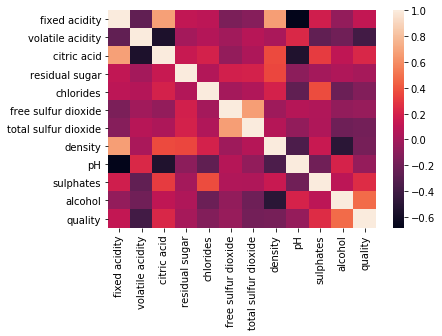

In [58]:
sb.heatmap(df.corr())

If we look at the last column, we can appreciate that alcohol is the one variable that has the highest positive correlation coefficient with quality. It is given by that orange colour which indicates a correlation of around 0.45. However, let's calculate the exact value.

In [59]:
np.corrcoef(df['alcohol'], df['quality'])[1,0]  # Looking for the exact correlation coefficient

0.4761663240011359

Now, correlation values that are between 0.3 and 0.5 indicate a **low correlation** between variables. Therefore, we can conclude that the correlation between alcohol and quality is not statistically significant to state that the more alcohol the wine has, the better the quality. However, we cannot say the opposite either. Meaning that we still cannot say that lower alcohol will result in better quality either.

## Can we predict pH based on fixed acidity, volatile acidity, and citric acid?

In [60]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid']]
y = df['pH']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Prediction using the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using the model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("The train score was {} and the test score was {}".format(train_score, test_score))

The train score was 0.5010872957840673 and the test score was 0.43448687259496355


The test score suggests that it is **not possible to predict pH** based just on fixed acidity, volatile acidity, and citric acid. Our intuition might say that we would need other parameters such as residual sugar or chlorides to make a more accurate prediction.

## Can we predict quality based on all the given parameters of the dataset?

In [61]:
X = df.drop('quality', axis=1)
y = df['quality']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit

#Prediction using the model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

#Score using the model
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("The train score was {} and the test score was {}".format(train_score, test_score))

The train score was 0.37856225436583757 and the test score was 0.3050817207408507


The test score of around 30% indicates that we **cannot predict quality accurately** with the given parameters of the dataset.